In [ ]:
from pydantic import BaseModel
from typing import Annotated, List
from langgraph.graph import StateGraph, START,END
from langchain_groq import ChatGroq
from langgraph.graph.message import add_messages
from langchain_core.messages import AnyMessage, trim_messages, HumanMessage

In [34]:
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

In [35]:
from langgraph.checkpoint.memory import MemorySaver
from IPython.display import Image, display

In [36]:
class StateSchema(BaseModel):
    messages:Annotated[List[AnyMessage],add_messages]

In [37]:
model = ChatGroq(model="llama-3.1-8b-instant",temperature=0)

In [38]:
def multiply(a:int,b:int) -> int:
    """
    Multiply the two number a and b
    
    args:
    a:int
    b:int
    """
    return a*b

def add(a:int,b:int) -> int:
    """
    Add the two number a and b
    
    args:
    a:int
    b:int
    """
    return a+b

def divide(a:int,b:int) -> int:
    """
    Divide the two number a and b
    
    args:
    a:int
    b:int
    """
    return int(a/b)

In [39]:
tools = [multiply,divide,add]
llm_with_tools = model.bind_tools(tools)

In [40]:
memory = MemorySaver()

In [ ]:
def assistant(state:StateSchema):
    #print(state.model_dump_json(indent = 2))
    
    messages = trim_messages(
        messages = state.messages,
        max_tokens = 300,
        token_counter = model,
        strategy = "last",
        allow_partial = "True"
    )
    print(messages)
    
    return StateSchema(
        messages = [llm_with_tools.invoke(messages)]
    )

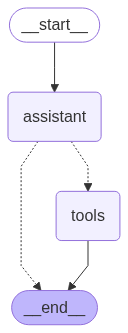

In [42]:
builder = StateGraph(StateSchema)
builder.add_node("assistant",assistant)
builder.add_node("tools",ToolNode(tools))

builder.add_edge(START,"assistant")
builder.add_conditional_edges("assistant",tools_condition)
builder.add_edge("tools",END)

graph = builder.compile(checkpointer=memory)
display(Image(graph.get_graph().draw_mermaid_png()))

In [43]:
result = graph.invoke(StateSchema(messages=[HumanMessage(content = "can you explain how earth revolves around sun")]),config = {"configurable":{"thread_id":"firstchat"}})
result

[HumanMessage(content='can you explain how earth revolves around sun', additional_kwargs={}, response_metadata={}, id='1d52c16a-0b17-487f-a600-dc8ec86aad0f')]


{'messages': [HumanMessage(content='can you explain how earth revolves around sun', additional_kwargs={}, response_metadata={}, id='1d52c16a-0b17-487f-a600-dc8ec86aad0f'),
  AIMessage(content="The Earth revolves around the Sun due to the gravitational force between the two bodies. Here's a simplified explanation:\n\n1. **Gravity**: The Sun is a massive object with a huge amount of mass. According to Newton's law of universal gravitation, every object in the universe attracts every other object with a force proportional to their masses and the distance between them. The Sun's gravity pulls on the Earth, and the Earth's gravity pulls on the Sun, but the Sun's mass is so much larger that its gravity dominates the interaction.\n\n2. **Orbit**: The Earth's velocity and the Sun's gravity combine to create an orbit. The Earth moves at a speed of about 29.78 kilometers per second (18.5 miles per second) in its orbit around the Sun. This speed is just right to balance the gravitational force, a

In [ ]:
result = graph.invoke(StateSchema(messages=[HumanMessage(content = "does earth and moon also have similar relationship")]),config = {"configurable":{"thread_id":"firstchat"}})
result

[AIMessage(content="   - The orbit of a planet is an ellipse with the Sun at one of the two foci.\n   - The line connecting the planet to the Sun sweeps out equal areas in equal times.\n   - The square of the orbital period of a planet is proportional to the cube of the semi-major axis of its orbit.\n\n4. **Earth's rotation**: The Earth also rotates on its axis, which is tilted at an angle of about 23.5 degrees relative to its orbit around the Sun. This tilt is responsible for the changing seasons.\n\n5. **Earth's orbit**: The Earth's orbit is not a perfect circle, but an ellipse. The closest point in the orbit, called perihelion, occurs around early January when the Earth is about 147.1 million kilometers (91.4 million miles) away from the Sun. The farthest point, called aphelion, occurs around early July when the Earth is about 152.1 million kilometers (94.5 million miles) away from the Sun.\n\nThe combination of the Earth's velocity, the Sun's gravity, and the Earth's rotation creat

{'messages': [HumanMessage(content='can you explain how earth revolves around sun', additional_kwargs={}, response_metadata={}, id='1d52c16a-0b17-487f-a600-dc8ec86aad0f'),
  AIMessage(content="The Earth revolves around the Sun due to the gravitational force between the two bodies. Here's a simplified explanation:\n\n1. **Gravity**: The Sun is a massive object with a huge amount of mass. According to Newton's law of universal gravitation, every object in the universe attracts every other object with a force proportional to their masses and the distance between them. The Sun's gravity pulls on the Earth, and the Earth's gravity pulls on the Sun, but the Sun's mass is so much larger that its gravity dominates the interaction.\n\n2. **Orbit**: The Earth's velocity and the Sun's gravity combine to create an orbit. The Earth moves at a speed of about 29.78 kilometers per second (18.5 miles per second) in its orbit around the Sun. This speed is just right to balance the gravitational force, a